## Importation des librairies 

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython import display

In [78]:
# Idée : Propagation du feu dans une forêt
# 0 = Terre
# 1 = Arbre
# 2 = Feu
# 3 = Mort

## Corps :

### Initialiser une forêt de taille n :

In [300]:
def create_database(x,y):
    return np.random.choice([0,1],size=(x,y),p=[.2,.8])

In [260]:
data = create_database(10,10)
data


array([[1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
       [0, 1, 0, 1, 1, 1, 0, 0, 1, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 1, 1, 0, 1, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 1, 0]])

In [168]:
def get_pos(forest):
    set1 = set()
    set2 = set()
    for i in fores

SyntaxError: invalid syntax (<ipython-input-168-c735daa3d33e>, line 4)

### Afficher une forêt :

In [239]:
def aff_forest(x,y,forest):
    x1,y1 = np.where(forest==1)# Foret x 
    x2,y2 = np.where(forest==0) # Terre x
    x3,y3 = np.where(forest==2) # Feu x
    x4,y4 = np.where(forest==3)    
    plt.title("Propagation du feu dans une forêt",fontweight="bold",fontname="Arial",fontsize="15")
    plt.scatter(x1,y1,c='green',marker='.',s=100)
    plt.scatter(x2,y2,c='grey',marker='.',s=100)
    plt.scatter(x3,y3,c='red',marker='.',s=100)
    plt.scatter(x4,y4,c='black',marker='.',s=100)
    return 0

In [262]:
data[5][5]=2

0

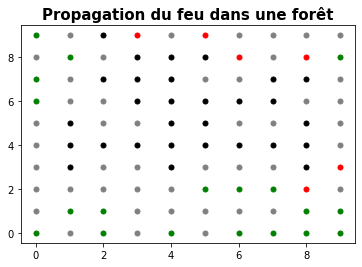

In [288]:
aff_forest(100,100,data)

In [277]:
data

array([[1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
       [0, 1, 0, 3, 3, 3, 0, 0, 1, 0],
       [1, 1, 0, 0, 3, 0, 0, 3, 0, 2],
       [0, 0, 0, 0, 3, 0, 3, 3, 3, 2],
       [1, 0, 0, 3, 3, 3, 3, 3, 3, 0],
       [0, 0, 1, 0, 3, 3, 3, 0, 3, 2],
       [1, 0, 1, 0, 3, 0, 3, 0, 2, 0],
       [1, 0, 1, 0, 3, 0, 3, 3, 0, 0],
       [1, 1, 2, 3, 3, 3, 0, 3, 2, 0],
       [1, 1, 0, 2, 0, 0, 0, 0, 1, 0]])

### Actualiser la forêt :

In [93]:
def init_fire_spread(forest):
    if(len(np.unique(forest))==2):
        x,y=np.where(forest==1)
        random_i = np.random.randint(0,len(x),1)
        i_x = int(x[random_i])
        i_y = int(y[random_i])
        forest[i_x][i_y]=2     
    return forest

In [192]:
init_fire_spread(data)

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [304]:
def fire_spreading(forest):
    x,y = np.where(forest==2)
    for i in range(len(x)):
        if (x[i]<len(forest)-1) and (y[i]<len(forest[0])-1) and (x[i]>0) and (y[i] > 0):
            if forest[x[i]+1][y[i]]==1:
                forest[x[i]+1][y[i]]=2
            if forest[x[i]-1][y[i]]==1:
                forest[x[i]-1][y[i]]=2
            if forest[x[i]][y[i]+1]==1:
                forest[x[i]][y[i]+1]=2
            if forest[x[i]][y[i]-1]==1:
                forest[x[i]][y[i]-1]=2
            forest[x[i]][y[i]]=3
        else:
            forest[x[i]][y[i]]=3
            return 0

In [287]:
fire_spreading(data)

[2 3 5 6 8 8 9] [9 9 9 8 2 8 3]


0

### Simuler la propagation :

In [308]:
def launch(x,y):
    forest = pd.DataFrame(create_database(x,y))
    while fire_spreading(forest)!=0:
        init_fire_spread(forest)
        fire_spreading(forest)
        aff_forest(x,y,forest)
        plt.pause(0.01)
        display.clear_output(wait=True)
    return aff_forest(x,y,forest)

0

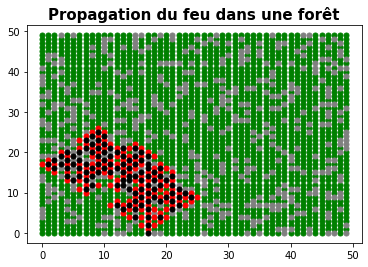

In [328]:
launch(50,50)